# Graph exploration

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import networkx as nx

Load the movie data and extract the attributes

In [3]:
movie_df = pd.read_csv(Data_path+'tmdb_5000_movies.csv')

In [16]:
nodes_attributes_df = movie_df[['id', 'title', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
nodes_attributes_df.head()

,id,title,budget,popularity,revenue,runtime,vote_average,vote_count
0,19995,Avatar,237000000,150.437577,2787965087,162.0,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,139.082615,961000000,169.0,6.9,4500
2,206647,Spectre,245000000,107.376788,880674609,148.0,6.3,4466
3,49026,The Dark Knight Rises,250000000,112.312950,1084939099,165.0,7.6,9106
4,49529,John Carter,260000000,43.926995,284139100,132.0,6.1,2124


Load the Adjacency matrix

Build a networkX graph from the adjacency matrix

In [10]:
def graph_summary(G):
    n_edges = G.number_of_edges()
    n_nodes = G.number_of_nodes()
    n_connect_comp = nx.number_connected_components(G)
    avg_degree = 2*n_edges/n_nodes
    avg_cluster_coef = nx.average_clustering(G)

    print(f'>>> Network summary : \n', \
          f'--> {n_edges} edges\n', \
          f'--> {n_nodes} nodes\n', \
          f'--> average degree : {avg_degree:.0f}\n', \
          f'--> connected compoenent : {n_connect_comp}\n', \
          f'--> average clustering coeeficient : {avg_cluster_coef:.3f}')

In [11]:
G=nx.from_numpy_matrix(adj_mat)
graph_summary(G)

>>> Network summary : 
 --> 43126 edges
 --> 4803 nodes
 --> average degree : 18
 --> connected compoenent : 490
 --> average clustering coeeficient : 0.302


Add the node attributes

In [23]:
nx.set_node_attributes(G, dict(nodes_attributes_df.transpose()))

Plot the degree distribution

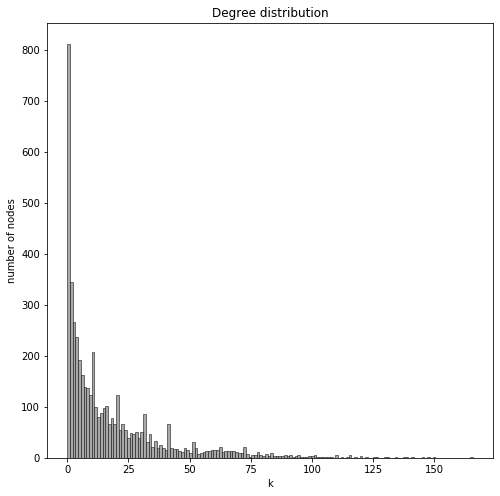

In [37]:
degrees = dict(G.degree()).values()

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.hist(degrees, color='darkgray', bins=degrees.max(), linewidth=0.5, edgecolor='black', log=True)
ax.set_title('Degree distribution')
ax.set_xlabel('k')
ax.set_ylabel('number of nodes')
plt.show()

Get the largest component and display it. 

In [12]:
G_large = max(nx.connected_component_subgraphs(G), key=len)
graph_summary(G_large)

>>> Network summary : 
 --> 43080 edges
 --> 4270 nodes
 --> average degree : 20
 --> connected compoenent : 1
 --> average clustering coeeficient : 0.339


In [13]:
pos=nx.spring_layout(G_large)

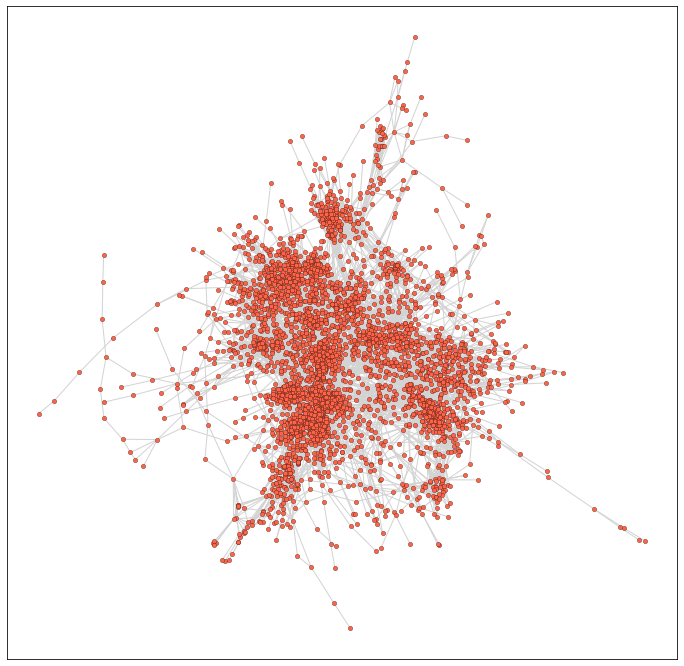

In [39]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
nx.draw_networkx(G_large, pos, ax=ax, \
                                with_labels=False, \
                                node_size=20, \
                                node_color='tomato', \
                                alpha=1, \
                                linewidths=0.25, \
                                width=1, \
                                edge_color='lightgray')
ax.collections[0].set_edgecolor("#000000") 
plt.show()